# Croq'Pain

You can find the Croq'Pain case on pages 299-306 in the textbook, _Data, Models, and Decisions_. Please use the data set provided and not the data from the book.

`CroqPain.parquet` is the full data set that includes all stores as well as a set of 10 potential new store locations. Below, we provide some extra guidance as you work through each part of the case.

### Before you start ...

There is a problem in the data file `CroqPain.parquet` (i.e., the data needs some 'cleaning'). Find the issue and propose a fix before you continue with the analysis.

* Hint: Check data histograms

Post questions on Piazza as needed. Discuss your "fix" with the TAs during a work session or post your proposed data "fix" on Piazza as a private post. Apply your fix and "store" it into a dataset called `CroqPainFix`.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyrsm as rsm

# Created the fixed file
# cpain_fixed = cpain.copy() 
# cpain_fixed = cpain_fixed.dropna(subset=["EARN"])
# cpain_fixed.to_parquet('CroqPainFix.parquet')

 # import fixed CroqPain parquet file
cpain = pd.read_parquet('CroqPainFix.parquet')
display(cpain)


,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.00,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.49,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.03,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.30,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.14,2.63,33.9,1,3,25,16.6,126,
5,6,221.673411,1184.9920,160,11.0,25.78,4.64,3.15,5.72,5.33,5.92,32.5,3,9,8,22.1,137,
6,7,292.870136,907.0924,94,5.0,19.00,3.60,2.33,4.75,4.97,3.03,33.1,0,11,89,24.3,134,
7,8,134.408827,764.0800,100,8.0,18.50,3.45,2.56,3.63,3.52,4.80,29.7,3,3,14,16.4,132,
8,9,37.439726,643.4230,85,14.0,14.21,1.93,4.28,1.74,2.06,2.96,28.4,4,12,43,12.9,129,
9,10,180.992809,665.5120,92,6.0,17.44,3.52,1.78,4.35,4.02,3.47,28.3,8,1,76,13.0,117,


### Part (a)

Visualize the data: examine histograms and scatterplots. Look at correlations between variables and try to identify sources of concern. Pay particular attention to the correlation for `total` and `P15` through `P55`. Do these correlations make sense to you?

Apply a transformation to the variables `EARN`, `P15`, `P25`, `P35`, `P45`, `P55`, `COMP`, `NCOMP`, and `NREST` where you normalize them by `total`. You can apply this normalization by defining new variables such as `EARN_total` which is equal to `EARN` divided by `total`.

Evaluate correlations and regressions with both the transformed and un-transformed data. Which do you prefer and why?

When you run regressions, be sure to use the `VIF` feature in Radiant for a more rigorous evaluation of multicollinearity. As you are building a model, it can also be useful to examine standardized coefficients. Also, conduct linear regression validation checks by using the `dashboard` plots in the `Plots` tab (see section 6.6 in the book).

If interested, you can experiment with the `Stepwise selection` option in the _Summary_ tab (i.e., click the checkbox) in the R version of Radiant (launched from RStudio). This is a feature in Radiant that uses a purely statistical approach to model building based on the Akaike Information Criterion (AIC). It will go through a series of steps and recommend a final model (see the bottom of the output). Compare the model selected using `Stepwise selection` to the model you arrived at yourself. Be critical and make a decision about the final model to recommend for Croq`Pain.

Linear regression (OLS)
Data                 : cpain
Response variable    : EARN
Explanatory variables: K, total, INC, COMP, NCOMP, NREST, PRICE, CLI, P15, P25, P35, P45, P55
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value   
Intercept     -3200.51   9520.551   -0.336   0.738   
K                 0.90      2.453    0.366   0.716   
total           837.69   1230.927    0.681     0.5   
INC             -65.55    162.167   -0.404   0.688   
COMP            426.00    222.233    1.917   0.061  .
NCOMP          -206.49    149.992   -1.377   0.175   
NREST            21.65     23.573    0.918   0.363   
PRICE           -25.66    109.794   -0.234   0.816   
CLI              33.95     67.525    0.503   0.618   
P15            -931.89   2678.093   -0.348   0.729   
P25            -944.75   1302.694   -0.725   0.472   
P35           -1867.86   2129.026   -0.877   0.385   
P45            -214.94   3177.57

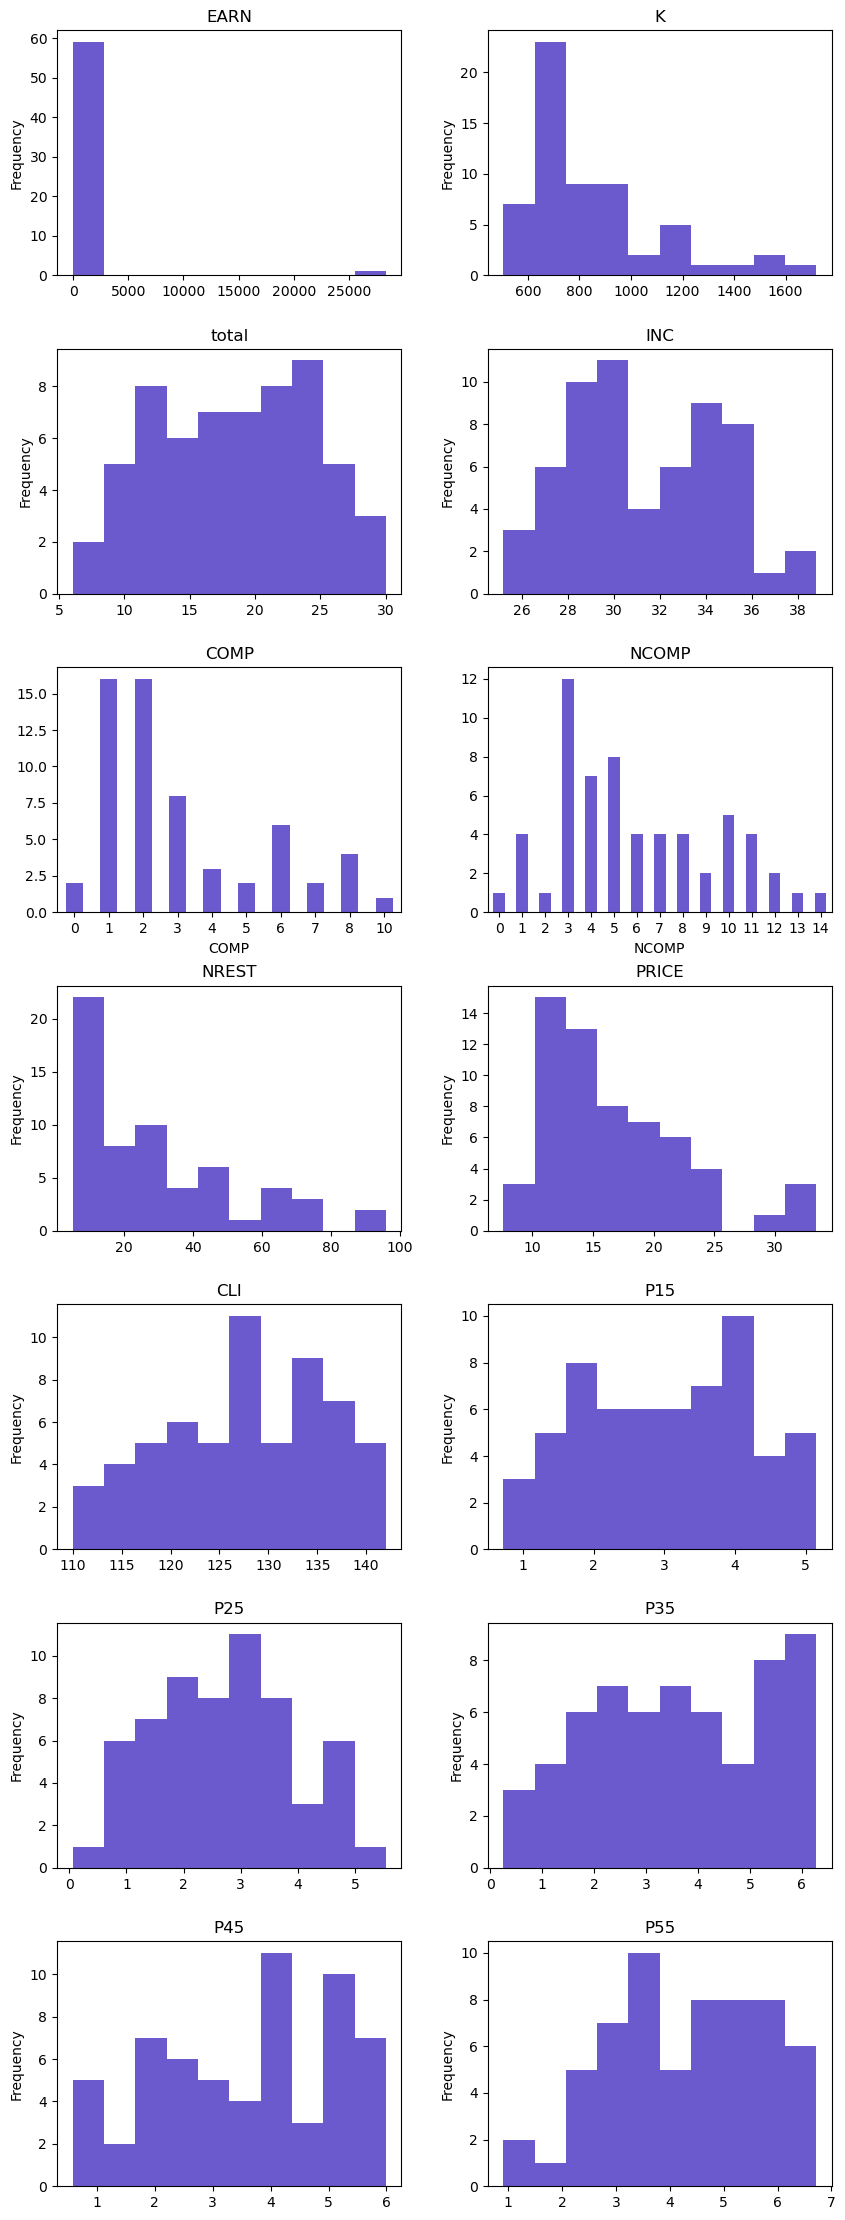

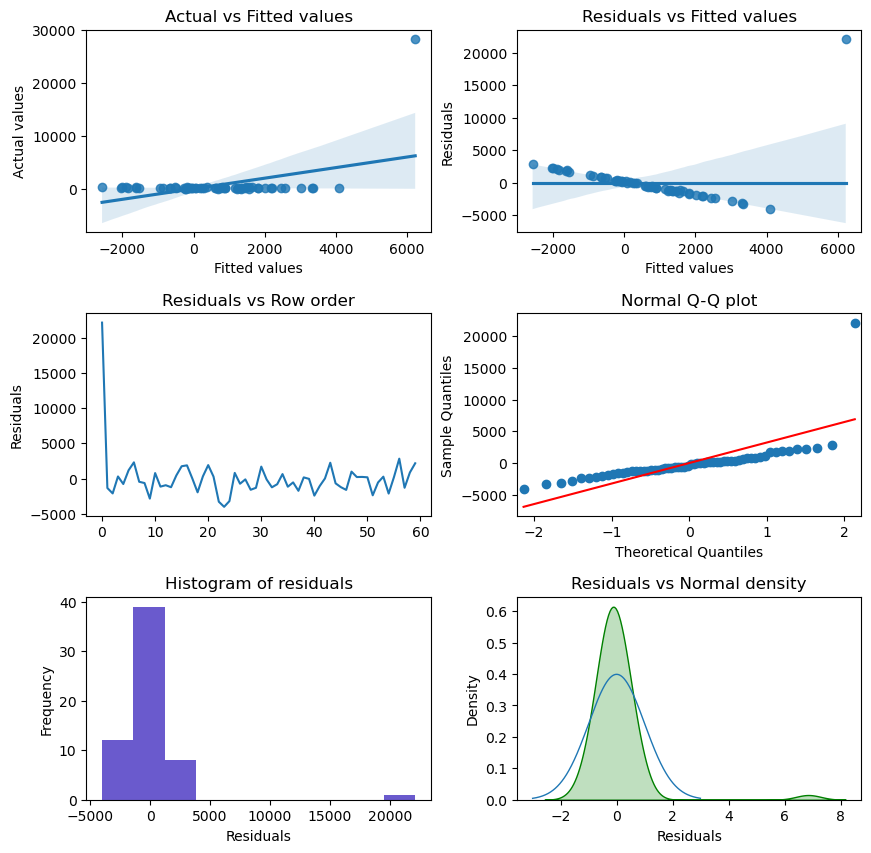

In [27]:
reg = rsm.regress({"cpain": cpain}, rvar="EARN", 
                  evar=["K", "total", "INC", "COMP", "NCOMP", "NREST", "PRICE", "CLI", "P15", "P25", "P35", "P45", "P55"])
reg.plot("distr")
#reg.plot("scatter")
reg.plot("dashboard")
#reg.summary(ci=True, vif=True)
reg.summary(ssq=True)
# ideally have an EARN/K > 0.26

# normalizing by total 
cpain["EARN_total"] = cpain["EARN"] / cpain["total"]
cpain["P15_total"] = cpain["P15"] / cpain["total"]
cpain["P25_total"] = cpain["P25"] / cpain["total"]
cpain["P35_total"] = cpain["P35"] / cpain["total"]
cpain["P45_total"] = cpain["P45"] / cpain["total"]
cpain["P55_total"] = cpain["P55"] / cpain["total"]    
cpain["COMP_total"] = cpain["COMP"] / cpain["total"]
cpain["NCOMP_total"] = cpain["NCOMP"] / cpain["total"]
cpain["NREST_total"] = cpain["NREST"] / cpain["total"]
cpain["K_total"] = cpain["K"] / cpain["total"]


Linear regression (OLS)
Data                 : cpain
Response variable    : EARN_total
Explanatory variables: K, total, COMP_total, NCOMP_total, NREST_total
Null hyp.: the effect of x on EARN_total is zero
Alt. hyp.: the effect of x on EARN_total is not zero

             coefficient  std.error  t.value p.value     
Intercept         -54.20    314.458   -0.172   0.864     
K                   0.21      0.180    1.142   0.259     
total              -4.06      9.829   -0.413   0.681     
COMP_total       1324.96    302.727    4.377  < .001  ***
NCOMP_total      -685.73    205.038   -3.344   0.002   **
NREST_total        -1.64     31.121   -0.053   0.958     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.361, Adjusted R-squared: 0.302
F-statistic: 6.108 df(5, 54), p.value < 0.001
Nr obs: 60

Sum of squares:

            df          SS
Regression   5   3,857,742
Error       54   6,821,023
Total       59  10,678,766

Variance inflation factors:

            

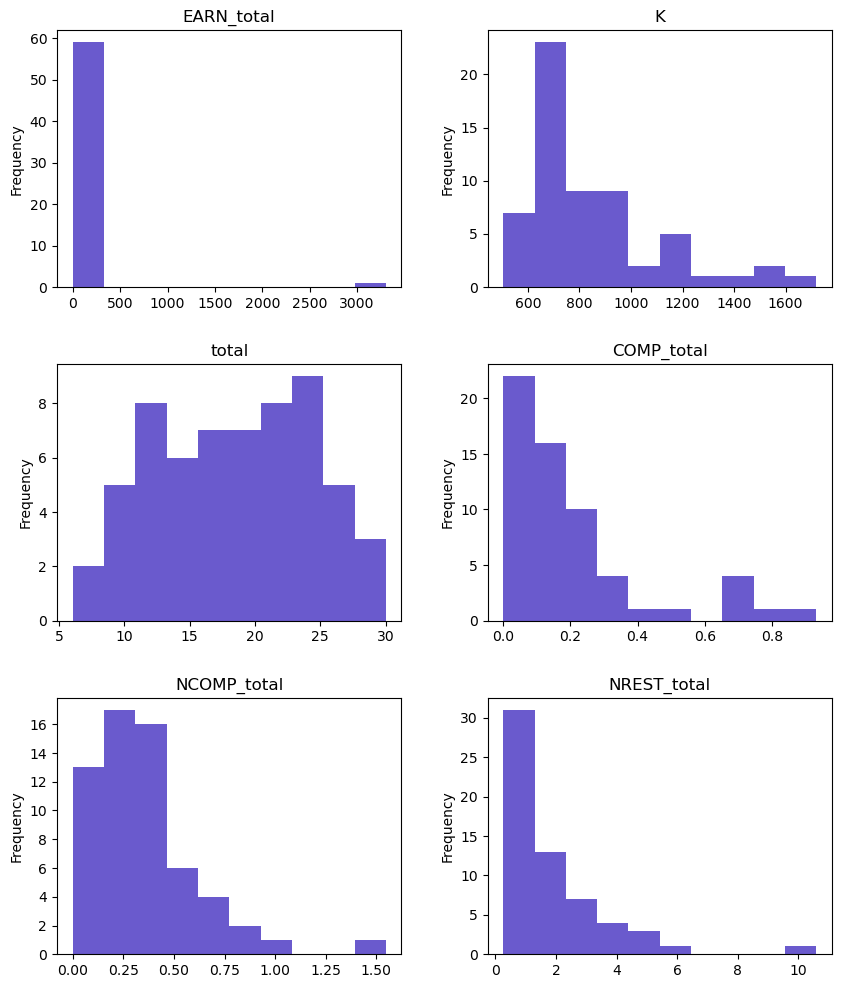

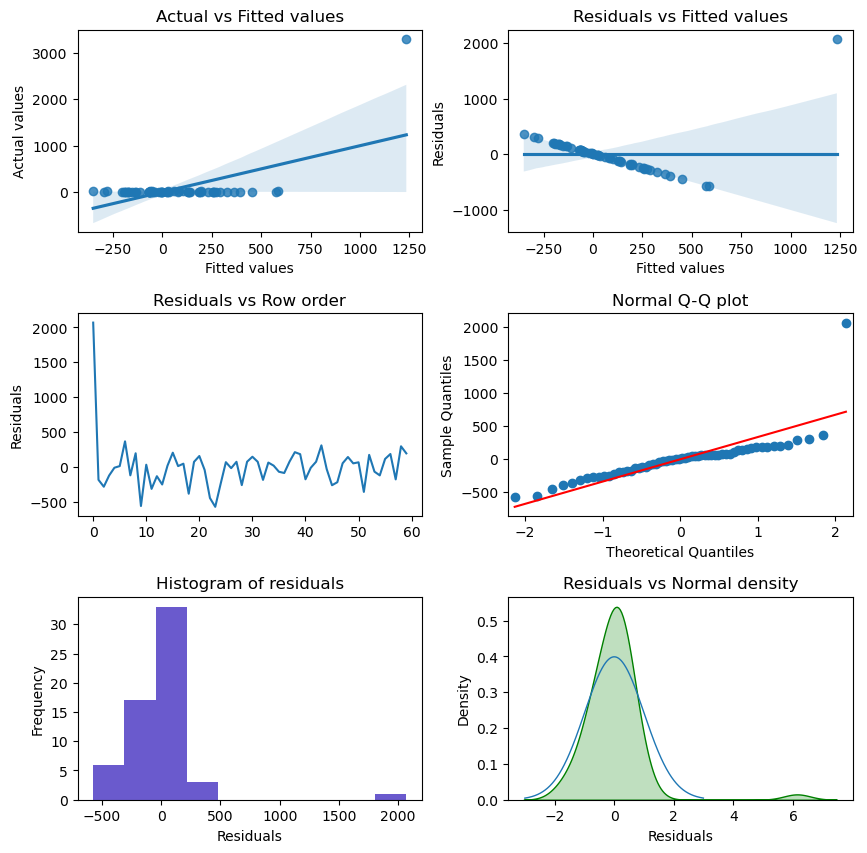

In [92]:
reg2 = rsm.regress({"cpain": cpain}, rvar="EARN_total", 
                  evar=["K", "total", "COMP_total", "NCOMP_total", "NREST_total"])

# , "P15_total", "P25_total","P35_total", "P45_total", "P55_total"

reg2.plot("distr")
#reg2.plot("scatter")
reg2.plot("dashboard")
reg2.summary(vif=True, ssq=True)

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Linear regression (OLS)
Data                 : log_cpain
Response variable    : log_EARN
Explanatory variables: K, log_COMP, log_NCOMP, log_NREST, total
Null hyp.: the effect of x on log_EARN is zero
Alt. hyp.: the effect of x on log_EARN is not zero

           coefficient  std.error  t.value p.value    
Intercept        -0.28      1.001   -0.279   0.781    
K                 0.00      0.001    2.108    0.04   *
log_COMP          3.19      1.126    2.829   0.007  **
log_NCOMP        -1.15      0.906   -1.264   0.212    
log_NREST         0.55      0.309    1.791   0.079   .
total             0.04      0.029    1.392    0.17    

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.242, Adjusted R-squared: 0.171
F-statistic: 3.388 df(5, 53), p.value 0.01
Nr obs: 59

Sum of squares:

            df  SS
Regression   5  17
Error       53  55
Total       58  73

Variance inflation factors:

             vif    Rsq
total      1.730  0.422
log_COMP   1.682  0.406
log_

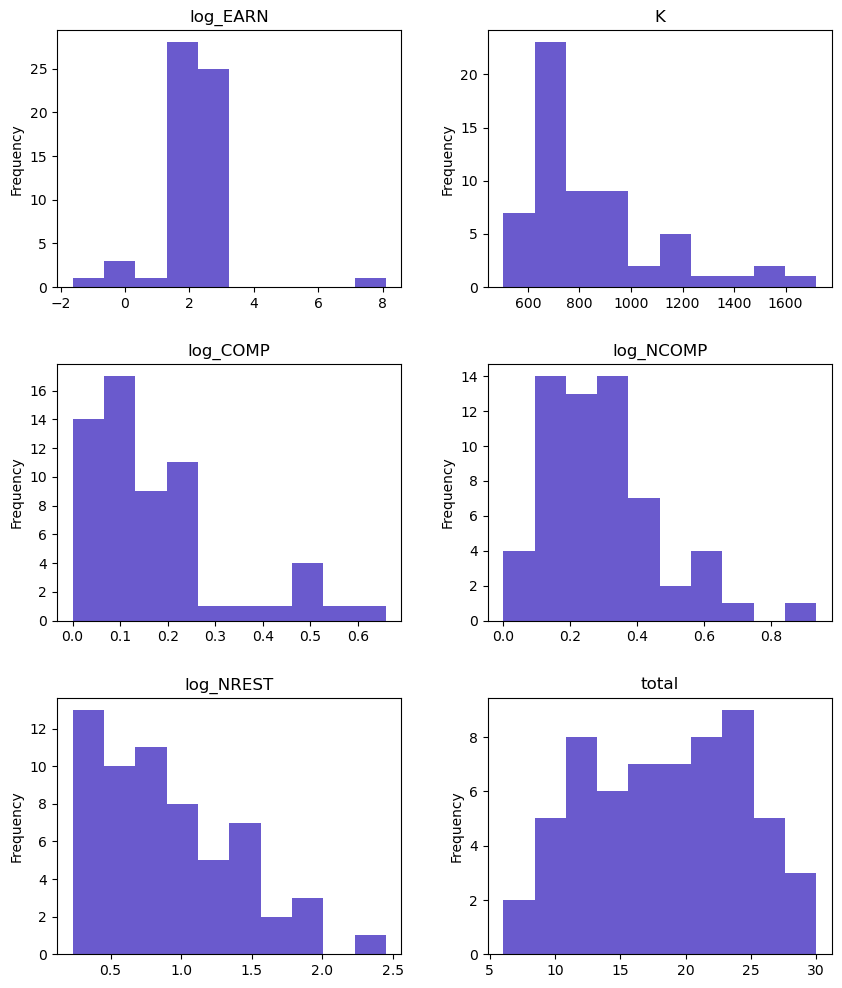

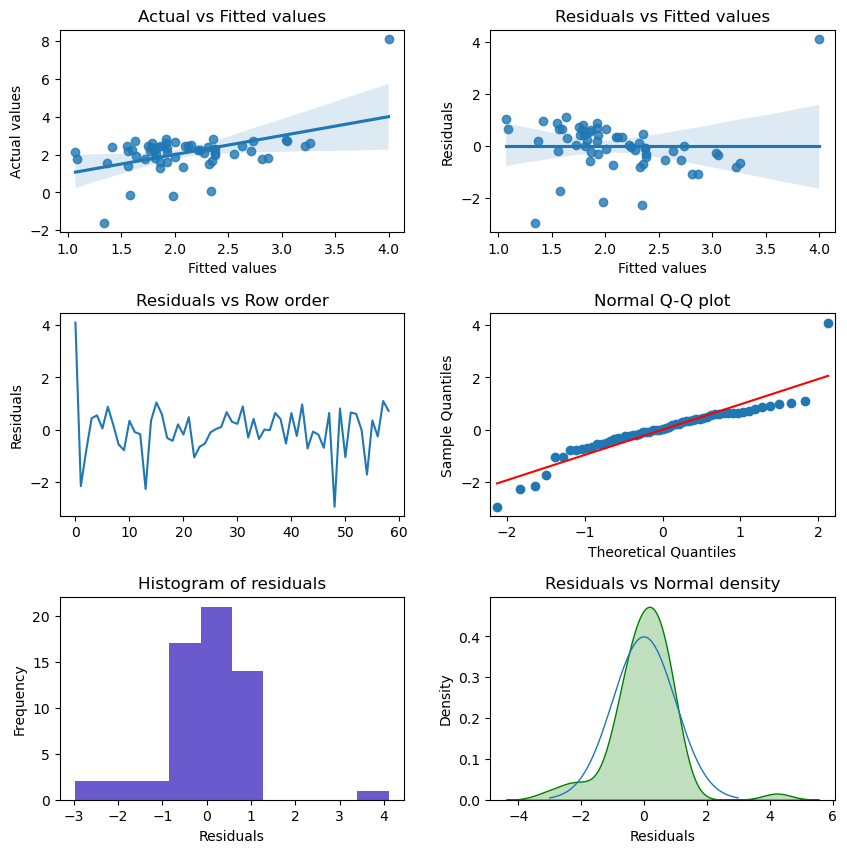

In [108]:
"""
reg3 = rsm.regress({"cpain": cpain}, rvar="EARN_total", 
                  evar=["K","COMP_total", "NCOMP_total", "NREST_total"])
reg3.plot("distr")
reg3.plot("scatter")
reg3.plot("dashboard")
reg3.summary(vif=True, ssq=True)
"""
log_cpain = cpain.copy()
log_cpain["log_EARN"] = np.log(cpain["EARN_total"]+1)
log_cpain["log_K"] = np.log(cpain["K_total"]+1)
log_cpain["log_COMP"] = np.log(cpain["COMP_total"]+1)
log_cpain["log_NCOMP"] = np.log(cpain["NCOMP_total"]+1)
log_cpain["log_NREST"] = np.log(cpain["NREST_total"]+1)

#display(log_cpain)

reg4 = rsm.regress({"log_cpain": log_cpain}, rvar="log_EARN",
                  evar=["K","log_COMP", "log_NCOMP", "log_NREST", "total"])

reg4.plot("distr")
reg4.plot("dashboard")
reg4.summary(ssq=True, vif=True)

### Part (b)

Remember to use a subset of the `CroqPainFix` data with only the 50 stores opened up prior to 1994. After you build your regression model using `CroqPainFix` select the `Predict` tab in Radiant.

Linear regression (OLS)
Data                 : cpain
Response variable    : log_EARN
Explanatory variables: log_K, log_COMP, log_NCOMP, log_NREST, total
Null hyp.: the effect of x on log_EARN is zero
Alt. hyp.: the effect of x on log_EARN is not zero

           coefficient  std.error  t.value p.value    
Intercept        -4.75      2.862   -1.660   0.104    
log_K             1.06      0.522    2.038   0.048   *
log_COMP          3.64      1.208    3.010   0.004  **
log_NCOMP        -1.30      0.977   -1.329   0.191    
log_NREST         0.50      0.343    1.453   0.153    
total             0.11      0.047    2.307   0.026   *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.281, Adjusted R-squared: 0.198
F-statistic: 3.366 df(5, 43), p.value 0.012
Nr obs: 49

Sum of squares:

            df  SS
Regression   5  18
Error       43  47
Total       48  66

Variance inflation factors:

             vif    Rsq
total      3.920  0.745
log_K      2.884  0.653
log

,log_K,log_COMP,log_NCOMP,log_NREST,total,prediction,predicted_earn,original_K,ratio
50,3.817585,0.108566,0.295678,0.912614,17.44,1.675079,75.675950,775.9792,0.097523
51,3.937521,0.434038,0.434038,1.861718,12.88,2.784132,195.592527,647.7520,0.301956
52,3.896037,0.067548,0.350155,0.398218,14.31,0.941702,22.385749,689.8432,0.032450
53,4.026132,0.207784,0.325636,0.836684,12.99,1.697139,57.913448,715.0180,0.080996
54,3.705890,0.168181,0.168181,0.681480,16.38,1.707802,73.985538,650.0608,0.113813
55,3.635232,0.089505,0.318113,0.384013,21.36,1.544925,78.767550,788.4112,0.099907
56,3.538542,0.082013,0.355820,1.306252,23.40,2.047866,157.981434,781.9510,0.202035
57,4.237529,0.083977,0.123461,1.012357,22.83,2.892279,388.894563,1557.8410,0.249637
58,4.252068,0.071408,0.510530,1.257510,13.51,1.468435,45.156259,935.5750,0.048266
59,3.331852,0.038481,0.272961,0.795777,25.49,1.749627,121.140175,687.9784,0.176081


            K        EARN     ratio
50   775.9792  216.280373  0.278719
51   647.7520   65.693555  0.101418
52   689.8432   67.637840  0.098048
53   715.0180  127.942730  0.178936
54   650.0608   82.938446  0.127586
55   788.4112   -2.880188 -0.003653
56   781.9510  247.737268  0.316819
57  1557.8410  343.015804  0.220187
58   935.5750  193.141365  0.206441
59   687.9784  277.527489  0.403396


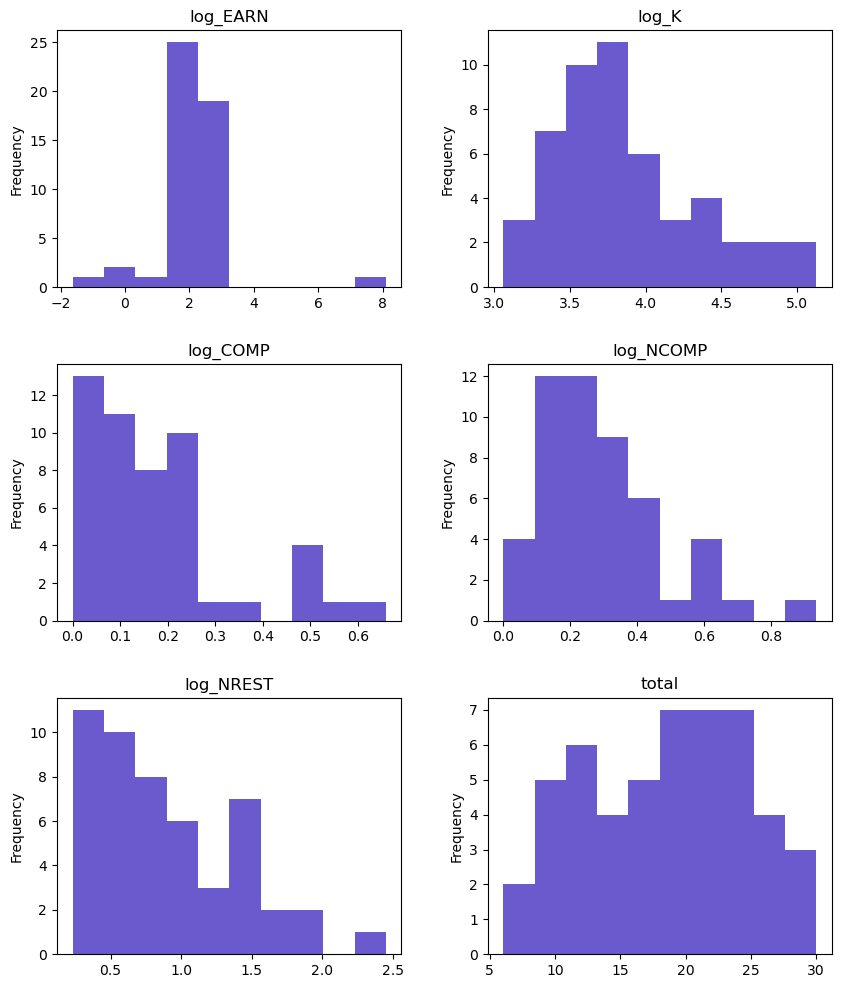

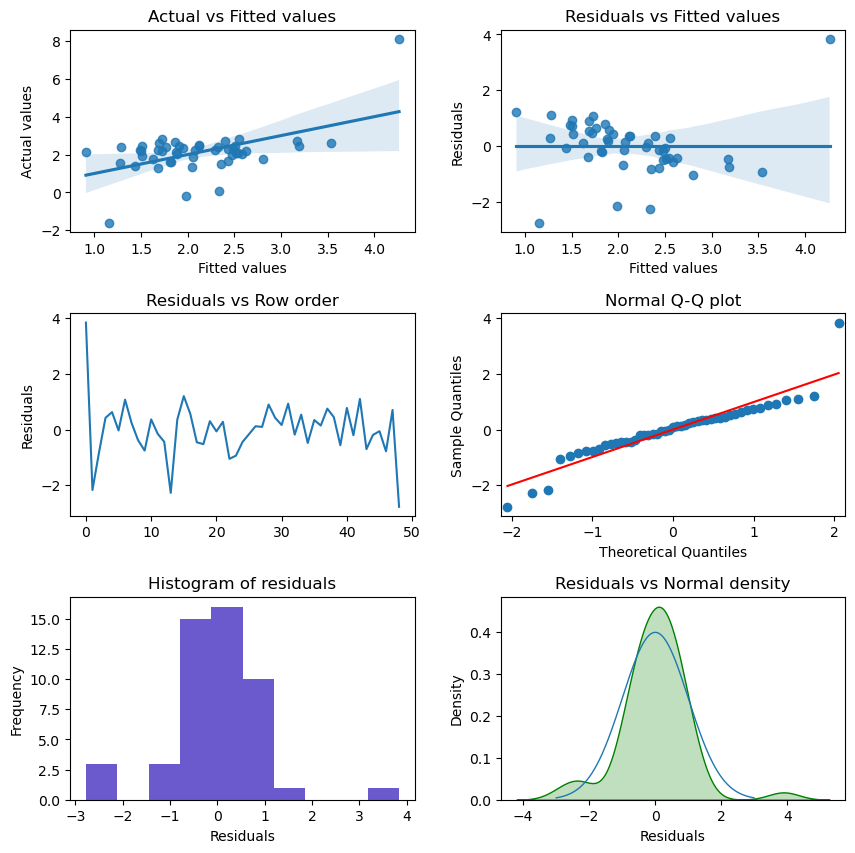

In [138]:
# build regression model 
from sklearn.metrics import mean_squared_error

# Select 50 records from the data set
first_50_cpain = log_cpain[0:50].copy()
#print(first_50_cpain)

# training the model on the first 50 records (note: excluded INC based on residual graph of norm distribution)
reg4 = rsm.regress({"cpain": first_50_cpain}, rvar="log_EARN",
                  evar=["log_K","log_COMP", "log_NCOMP", "log_NREST", "total"])

reg4.plot("distr")
reg4.plot("dashboard")
reg4.summary(ssq=True, vif=True)

# select last 10 records from the data set 
last_10_cpain = log_cpain[-10:].copy()

# predicting the earnings / ratio of the last 10 records in the data set
pred = reg4.predict(data=last_10_cpain)

# converting the log values back to original values
pred["predicted_earn"] = (np.exp(pred["prediction"])-1) * pred["total"]
pred["original_K"] = (np.exp(pred["log_K"]) - 1) * pred["total"]
pred["ratio"] = pred["predicted_earn"] / pred["original_K"]
display(pred)
last_10_cpain["ratio"] = last_10_cpain["EARN"] / last_10_cpain["K"]

# printing the actual earnings / ratio of the last 10 records in the data set
print(last_10_cpain[["K","EARN","ratio"]])

### Part (c)

This part can be completed using the same Radiant features applied earlier.

---
Copyright (c), 2018 by Vincent Nijs, Rady School of Management,
University of	California, San Diego, Otterson Hall, 3W116,
9500 Gilman Drive, MC 0553, La Jolla, California 92093-0553,
e-mail: vnijs@ucsd.edu

In [137]:
import pandas as pd

# train the model with all 60 clean records 
final_reg = rsm.regress({"cpain": log_cpain}, rvar="log_EARN",
                  evar=["log_K","log_COMP", "log_NCOMP", "log_NREST", "total"])

# import the CitiesToEstimate.csv
new_cities = pd.read_csv("CitiesToEstimate.csv")

#print(new_cities)

# prepping the data to submit it to the model
new_cities["COMP_total"] = new_cities["COMP"] / new_cities["total"]
new_cities["NCOMP_total"] = new_cities["NCOMP"] / new_cities["total"]
new_cities["NREST_total"] = new_cities["NREST"] / new_cities["total"]
new_cities["K_total"] = new_cities["K"] / new_cities["total"]

new_cities["log_K"] = np.log(new_cities["K_total"]+1)
new_cities["log_COMP"] = np.log(new_cities["COMP_total"]+1)
new_cities["log_NCOMP"] = np.log(new_cities["NCOMP_total"]+1)
new_cities["log_NREST"] = np.log(new_cities["NREST_total"]+1)

# Pass the cities into the model to predict the earnings
new_city_pred = final_reg.predict(data=new_cities)

# add some columns to the prediction to understand if any have over a 0.26 earnings / K ratio
new_city_pred["predicted_earn"] = (np.exp(new_city_pred["prediction"])-1) * new_city_pred["total"]
new_city_pred["original_K"] = (np.exp(pred["log_K"])-1) * new_city_pred["total"]
new_city_pred["ratio"] = new_city_pred["predicted_earn"] / new_city_pred["original_K"]

# will need to pull the city names that have a ratio > 0.26
display(new_city_pred)



/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_K,log_COMP,log_NCOMP,log_NREST,total,prediction,predicted_earn,original_K,ratio
0,0.093819,0.000596,0.000745,0.002679,6710,638.684306,1.598793e+281,NaN,NaN
1,0.064284,0.000634,0.000543,0.001900,11040,1053.458340,inf,NaN,NaN
2,0.084489,0.000084,0.000336,0.001091,11910,1136.820847,inf,NaN,NaN
3,0.071070,0.000440,0.000705,0.005448,11350,1083.163570,inf,NaN,NaN
4,0.202124,0.003423,0.001998,0.010799,3500,331.294157,2.650282e+147,NaN,NaN
5,0.070198,0.000079,0.000707,0.003218,12720,1214.403238,inf,NaN,NaN
6,0.504783,0.001204,0.000000,0.003008,1660,155.323023,4.742858e+70,NaN,NaN
7,0.075504,0.000425,0.000425,0.001168,9410,897.318591,inf,NaN,NaN
8,0.030243,0.000210,0.000263,0.001366,19020,1817.888146,inf,NaN,NaN
9,0.052435,0.000237,0.000948,0.004260,12650,1207.680249,inf,NaN,NaN
